In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
scores = np.array([2.72, 3.26, 0.88, 0.76, 3.42, 
                   2.87, 4.50, 1.92, 2.21, -1.35], dtype=np.float)
y_true = np.array([1, 0, 0, 1, 1, 1, 1, 0, 0, 0], dtype=np.int)
threshs = np.linspace(-2.0, 6.0, num=1000)

In [3]:
precisions = []
recalls = []
for thr in threshs:
    y_pred = (scores > thr).astype(np.int)
    if np.sum(y_pred == 1) == 0:
        prec = np.nan
    else:
        prec = np.sum((y_pred == y_true) & (y_pred == 1)) / np.sum(y_pred == 1)
    precisions.append(prec)
    rec = np.sum((y_pred == y_true) & (y_pred == 1)) / np.sum(y_true == 1)
    recalls.append(rec)

### 정밀도,재현율-문턱값 플롯

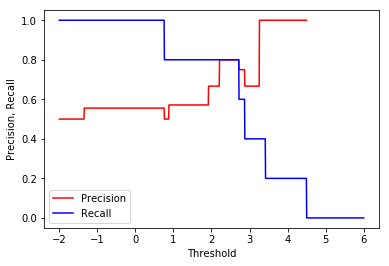

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(threshs, precisions, color='r', label='Precision')
ax.plot(threshs, recalls, color='b', label='Recall')
ax.set_xlabel('Threshold')
ax.set_ylabel('Precision, Recall')
ax.legend()

plt.savefig('precision-recall-to-threshold-plot.svg')

### 정밀도-재현율 곡선 플롯

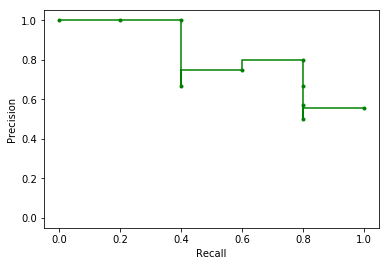

In [5]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_true, scores)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.step(recall, precision, color='g', marker='.', where='post')

ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_xlim([-0.05, 1.05])
ax.set_ylim([-0.05, 1.05])

plt.savefig('precision-recall-curve-plot.svg')